In [17]:
import pandas as pd
from google.colab import drive
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

def plot_confus(pred_lable, truelable):
  print(metrics.classification_report(pred_lable, truelable))
  print('Accuracy: ',metrics.accuracy_score(truelable, pred_lable))
  mat = confusion_matrix(truelable, pred_lable, labels=np.unique(truelable))
  sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap="YlGnBu")
  tick_marks = np.arange(len(np.unique(truelable)))
  plt.xticks(tick_marks, np.unique(truelable))
  plt.yticks(tick_marks, np.unique(truelable))
  plt.xlabel('true label')
  plt.ylabel('predicted label'); 

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=(4,4))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
ls 'drive/MyDrive/file2/result/model_ck_kaggle_jaffe/done/'

face2_01_KARNMAY_model_ck_kaggle_jaffe.csv
face2_01_KARNMAY_model_ck_kaggle_jaffe.gsheet
face2_02_Kemisara_model_ck_kaggle_jaffe.csv
face5_01_jaysbabyfood_model_ck_kaggle_jaffe.csv
face5_02_gssspotted_model_ck_kaggle_jaffe.csv
face5_03_clubfriday_model_ck_kaggle_jaffe.csv
face6_01_mintchyy_ep2_model_ck_kaggle_jaffe.csv
face6_02_Babyjingko_model_ck_kaggle_jaffe.csv
face7_01_mintchyy_QA_100_model_ck_kaggle_jaffe.csv
face7_2_01_thematter_model_ck_kaggle_jaffe.csv


<details>
    <summary>SOLUTION HERE!</summary>
    <pre>
        <code>

face2_01 = pd.read_csv('drive/MyDrive/file2/result/face2_01_KARNMAY_P1.csv')[['done', 'rasnetmark']]
face2_02 = pd.read_csv('drive/MyDrive/file2/result/face2_02_Kemisara_P1.csv')[['done', 'rasnetmark']]
face5_01 = pd.read_csv('drive/MyDrive/file2/result/face5_01_jaysbabyfood_P1.csv')[['done', 'rasnetmark']]
face5_02 = pd.read_csv('drive/MyDrive/file2/result/face5_02_gssspotted_P1.csv')[['done', 'rasnetmark']]
face5_03 = pd.read_csv('drive/MyDrive/file2/result/face5_03_clubfriday_P1.csv')[['done', 'rasnetmark']]
face6_01 = pd.read_csv('drive/MyDrive/file2/result/face6_01_mintchyy_ep2_P1.csv')[['done', 'rasnetmark']]
face6_02 = pd.read_csv('drive/MyDrive/file2/result/face6_02_Babyjingko_P1.csv')[['done', 'rasnetmark']]
face7_01 = pd.read_csv('drive/MyDrive/file2/result/face7_01_mintchyy_QA_100_P1.csv')[['done', 'rasnetmark']]
face7_2_01 = pd.read_csv('drive/MyDrive/file2/result/face7_2_01_thematter_P1.csv')[['done', 'rasnetmark']]
d = {'face2_01':face2_01, 'face2_02':face2_02, 'face5_01':face5_01, 'face5_02':face5_02,
          'face5_03':face5_03, 'face6_01':face6_01, 'face6_02':face6_02, 'face7_01':face7_01,
          'face7_2_01':face7_2_01}

for key, value in d.items():
  print(key, ' = ', value.columns.values)

face2_01 = pd.read_csv('drive/MyDrive/file2/result/model_FERG_DB_256/done/face2_01_KARNMAY_FERG_DB_256.csv')[['done', 'label']]
face2_02 = pd.read_csv('drive/MyDrive/file2/result/model_FERG_DB_256/done/face2_02_Kemisara_FERG_DB_256.csv')[['done', 'label']]
face5_01 = pd.read_csv('drive/MyDrive/file2/result/model_FERG_DB_256/done/face5_01_jaysbabyfood_FERG_DB_256.csv')[['done', 'label']]
face5_02 = pd.read_csv('drive/MyDrive/file2/result/model_FERG_DB_256/done/face5_02_gssspotted_FERG_DB_256.csv')[['done', 'label']]
face5_03 = pd.read_csv('drive/MyDrive/file2/result/model_FERG_DB_256/done/face5_03_clubfriday_FERG_DB_256.csv')[['done', 'label']]
face6_01 = pd.read_csv('drive/MyDrive/file2/result/model_FERG_DB_256/done/face6_01_mintchyy_ep2_FERG_DB_256.csv')[['done', 'label']]
face6_02 = pd.read_csv('drive/MyDrive/file2/result/model_FERG_DB_256/done/face6_02_Babyjingko_FERG_DB_256.csv')[['done', 'label']]
face7_01 = pd.read_csv('drive/MyDrive/file2/result/model_FERG_DB_256/done/face7_01_mintchyy_QA_100_FERG_DB_256.csv')[['done', 'label']]
face7_2_01 = pd.read_csv('drive/MyDrive/file2/result/model_FERG_DB_256/done/face7_2_01_thematter_FERG_DB_256.csv')[['done', 'label']]
        </code>
    </pre>
</details>

In [19]:
face2_01 = pd.read_csv('drive/MyDrive/file2/result/model_ck_kaggle_jaffe/done/face2_01_KARNMAY_model_ck_kaggle_jaffe.csv')[['done', 'label']]
face2_02 = pd.read_csv('drive/MyDrive/file2/result/model_ck_kaggle_jaffe/done/face2_02_Kemisara_model_ck_kaggle_jaffe.csv')[['done', 'label']]
face5_01 = pd.read_csv('drive/MyDrive/file2/result/model_ck_kaggle_jaffe/done/face5_01_jaysbabyfood_model_ck_kaggle_jaffe.csv')[['done', 'label']]
face5_02 = pd.read_csv('drive/MyDrive/file2/result/model_ck_kaggle_jaffe/done/face5_02_gssspotted_model_ck_kaggle_jaffe.csv')[['done', 'label']]
face5_03 = pd.read_csv('drive/MyDrive/file2/result/model_ck_kaggle_jaffe/done/face5_03_clubfriday_model_ck_kaggle_jaffe.csv')[['done', 'label']]
face6_01 = pd.read_csv('drive/MyDrive/file2/result/model_ck_kaggle_jaffe/done/face6_01_mintchyy_ep2_model_ck_kaggle_jaffe.csv')[['done', 'label']]
face6_02 = pd.read_csv('drive/MyDrive/file2/result/model_ck_kaggle_jaffe/done/face6_02_Babyjingko_model_ck_kaggle_jaffe.csv')[['done', 'label']]
face7_01 = pd.read_csv('drive/MyDrive/file2/result/model_ck_kaggle_jaffe/done/face7_01_mintchyy_QA_100_model_ck_kaggle_jaffe.csv')[['done', 'label']]
face7_2_01 = pd.read_csv('drive/MyDrive/file2/result/model_ck_kaggle_jaffe/done/face7_2_01_thematter_model_ck_kaggle_jaffe.csv')[['done', 'label']]

d = {'face2_01':face2_01, 'face2_02':face2_02, 'face5_01':face5_01, 'face5_02':face5_02,
          'face5_03':face5_03, 'face6_01':face6_01, 'face6_02':face6_02, 'face7_01':face7_01,
          'face7_2_01':face7_2_01}

for key, value in d.items():
  print(key, ' = ', value.columns.values)

face2_01  =  ['done' 'label']
face2_02  =  ['done' 'label']
face5_01  =  ['done' 'label']
face5_02  =  ['done' 'label']
face5_03  =  ['done' 'label']
face6_01  =  ['done' 'label']
face6_02  =  ['done' 'label']
face7_01  =  ['done' 'label']
face7_2_01  =  ['done' 'label']


In [20]:
# dictT = {'Neutral':'neutral', 'มีความสุข':'happy', 'ผ่อนคลาย':'relax', 'เครียด':'stress', 'เศร้า':'sad',
#          'มีความสุช':'happy', 'โกรธ':'stress', 'มีความสุุข':'happy', 'มีความสูข':'happy', 'ผ่่อนคลาย':'relax',
#          'ตื่นเต้น':'happy', 'ประหลาดใจ':'neutral', 'จริงจัง':'stress', 'neutral ': 'neutral', 'ผ่อ่นคลาย':'relax',
#          'มีตวามสุข':'happy', 'โกรธ ':'stress'}

# dictT = {'Neutral':'neutral', 'มีความสุข':'happy', 'ผ่อนคลาย':'neutral', 'เครียด':'stress', 'เศร้า':'sad',
#          'มีความสุช':'happy', 'โกรธ':'stress', 'มีความสุุข':'happy', 'มีความสูข':'happy', 'ผ่่อนคลาย':'neutral',
#          'ตื่นเต้น':'happy', 'ประหลาดใจ':'neutral', 'จริงจัง':'stress', 'neutral ': 'neutral', 'ผ่อ่นคลาย':'neutral',
#          'มีตวามสุข':'happy', 'โกรธ ':'stress', ' มีความสุข':'happy'}

dictT = {'Neutral':'neutral', 'มีความสุข':'happy', 'ผ่อนคลาย':'happy', 'เครียด':'stress', 'เศร้า':'sad',
         'มีความสุช':'happy', 'โกรธ':'stress', 'มีความสุุข':'happy', 'มีความสูข':'happy', 'ผ่่อนคลาย':'happy',
         'ตื่นเต้น':'happy', 'ประหลาดใจ':'neutral', 'จริงจัง':'stress', 'neutral ': 'neutral', 'ผ่อ่นคลาย':'happy',
         'มีตวามสุข':'happy', 'โกรธ ':'stress', ' มีความสุข':'happy'}

# model_FERG_DB_256 = {0: 'angry', 1: 'happy', 2: 'neutral', 3: 'sad'}
# model_FERG_DB_256 = {0: 'stress', 1: 'happy', 2: 'neutral', 3: 'sad'}
model_ck_kaggle_jaffe = {0: 'stress', 1: 'happy', 2: 'neutral', 3: 'sad'}

# dic_resmask =  {0:'stress',1:'stress', 2:'stress', 3:'happy',4:'sad',	5:'happy',6:'neutral', 9:'neutral', 17:'neutral', 12:'neutral', 24:'neutral', 33:'neutral', 16:'neutral', 14:'neutral', 13:'neutral'}
# dic_resmask =  {0:'stress',1:'stress', 2:'stress', 3:'happy',4:'sad',	5:'happy',6:'neutral', 'None':'nan', 'none':'nan'}
# dic_resmask_float =  {0:'stress',1:'stress', 2:'stress', 3:'happy',4:'sad',	5:'happy',6:'neutral'}

for key, value in d.items():
  value['done'] = value['done'].replace(dictT) 
  value['label'] = value['label'].replace(model_ck_kaggle_jaffe) 

In [21]:
print(pd.unique(face5_03 ['label']))
print(pd.unique(face5_03 ['done']))

['neutral']
['stress' 'sad']


########### face2_01 ################
              precision    recall  f1-score   support

       happy       0.21      1.00      0.35        12
     neutral       1.00      0.26      0.41       140
         sad       0.00      0.00      0.00         0
      stress       0.00      0.00      0.00         0

    accuracy                           0.32       152
   macro avg       0.30      0.31      0.19       152
weighted avg       0.94      0.32      0.40       152

Accuracy:  0.3157894736842105


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


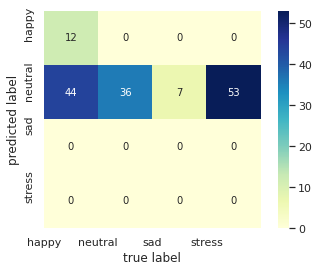


########### face2_02 ################
              precision    recall  f1-score   support

       happy       0.50      0.96      0.66        25
     neutral       0.53      0.41      0.46        22
      stress       0.44      0.15      0.22        27

    accuracy                           0.50        74
   macro avg       0.49      0.51      0.45        74
weighted avg       0.49      0.50      0.44        74

Accuracy:  0.5


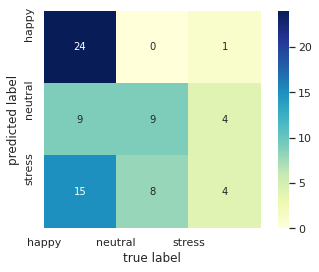


########### face5_01 ################
              precision    recall  f1-score   support

       happy       0.22      0.48      0.30        21
     neutral       0.83      0.26      0.39       116
         sad       0.00      0.00      0.00         0
      stress       0.17      0.65      0.27        17

    accuracy                           0.33       154
   macro avg       0.31      0.35      0.24       154
weighted avg       0.68      0.33      0.37       154

Accuracy:  0.33116883116883117


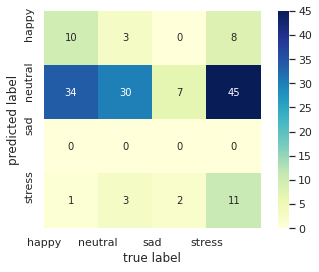


########### face5_02 ################
              precision    recall  f1-score   support

       happy       0.82      0.58      0.68        55
     neutral       0.11      0.40      0.17         5
      stress       0.29      0.33      0.31        12

    accuracy                           0.53        72
   macro avg       0.40      0.44      0.39        72
weighted avg       0.68      0.53      0.58        72

Accuracy:  0.5277777777777778


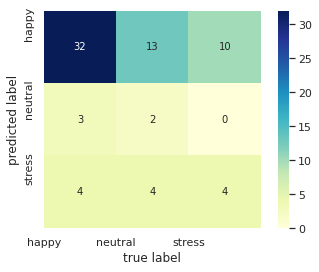


########### face5_03 ################
              precision    recall  f1-score   support

     neutral       0.00      0.00      0.00       5.0
         sad       0.00      0.00      0.00       0.0
      stress       0.00      0.00      0.00       0.0

    accuracy                           0.00       5.0
   macro avg       0.00      0.00      0.00       5.0
weighted avg       0.00      0.00      0.00       5.0

Accuracy:  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


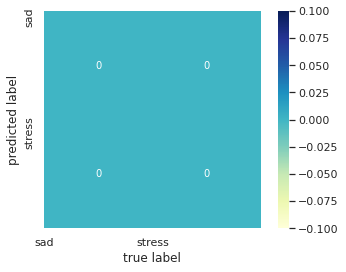


########### face6_01 ################
              precision    recall  f1-score   support

       happy       0.37      1.00      0.54        18
     neutral       0.92      0.45      0.61        75
         sad       0.00      0.00      0.00         0
      stress       0.30      0.40      0.34        15

    accuracy                           0.54       108
   macro avg       0.40      0.46      0.37       108
weighted avg       0.74      0.54      0.56       108

Accuracy:  0.5370370370370371


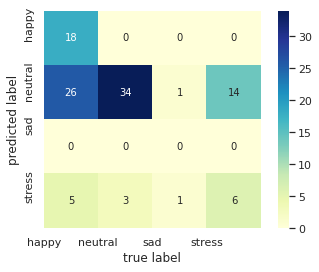


########### face6_02 ################
              precision    recall  f1-score   support

       happy       0.11      0.92      0.20        12
     neutral       0.04      0.30      0.07        10
         sad       0.00      0.00      0.00         0
      stress       0.92      0.17      0.29       206

    accuracy                           0.22       228
   macro avg       0.27      0.35      0.14       228
weighted avg       0.84      0.22      0.28       228

Accuracy:  0.21929824561403508


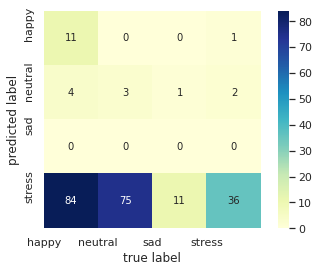


########### face7_01 ################
              precision    recall  f1-score   support

       happy       0.25      0.70      0.37        27
     neutral       0.84      0.42      0.57       153
      stress       0.28      0.52      0.36        31

    accuracy                           0.47       211
   macro avg       0.46      0.55      0.43       211
weighted avg       0.68      0.47      0.51       211

Accuracy:  0.47393364928909953


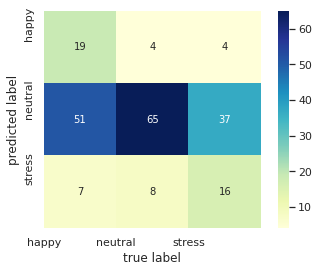


########### face7_2_01 ################
              precision    recall  f1-score   support

       happy       0.00      0.00      0.00         0
     neutral       1.00      0.70      0.82        10

    accuracy                           0.70        10
   macro avg       0.50      0.35      0.41        10
weighted avg       1.00      0.70      0.82        10

Accuracy:  0.7


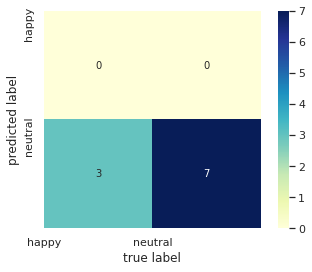

In [22]:
for key, value in d.items():
  print('###########',key,'################')
  plot_confus(value['label'], value['done'])
  # plot_confusion_matrix(value['done'], value['rasnetmark'], classes=pd.unique(dfname['done']),
  #                       normalize=False, title='Normalized Confusion Matrix')
  plt.show()
  print()